**Author** : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)

# <center> **Stroke Prediction Dataset**

## Import Library

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

from xgboost import XGBClassifier

from catboost import CatBoostClassifier


## Read Dataset

In [14]:
url = 'https://raw.githubusercontent.com/arienugroho050396/Stroke-Prediction-Dataset/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

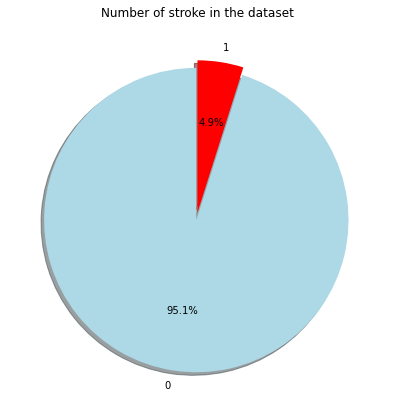

In [18]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [19]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,475,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


## Exploratory Data Analysis

In [20]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

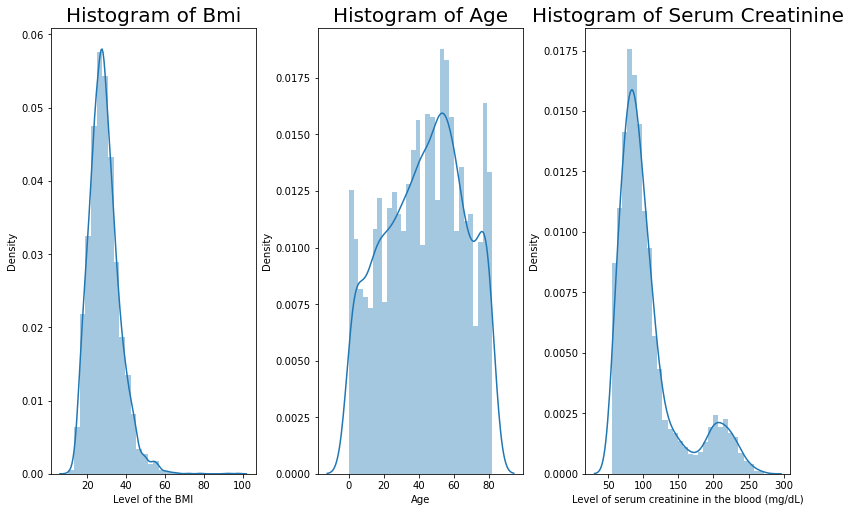

In [21]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

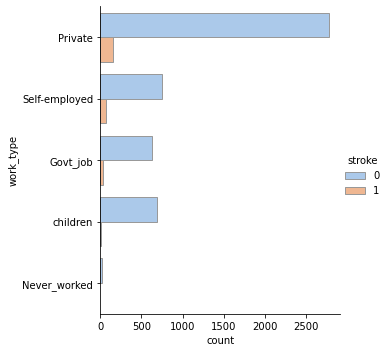

In [22]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

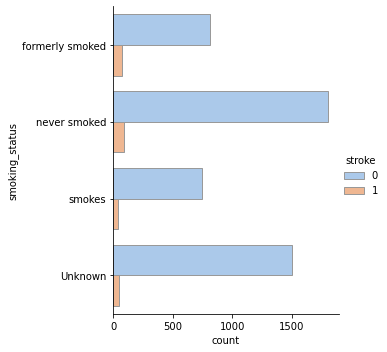

In [23]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<Figure size 1224x504 with 0 Axes>

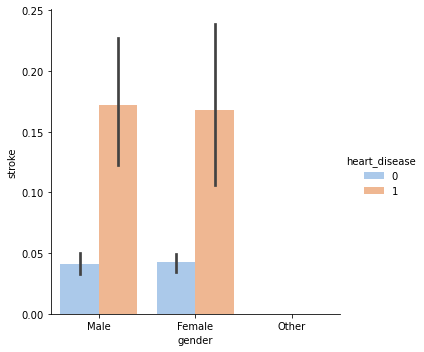

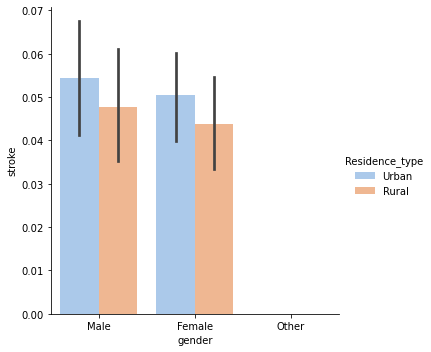

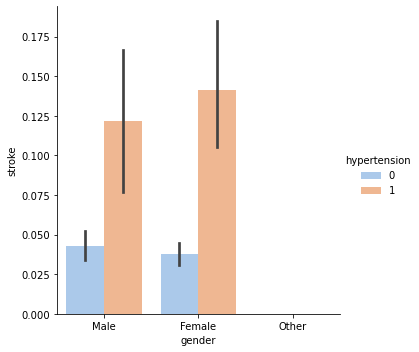

In [24]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

In [25]:
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

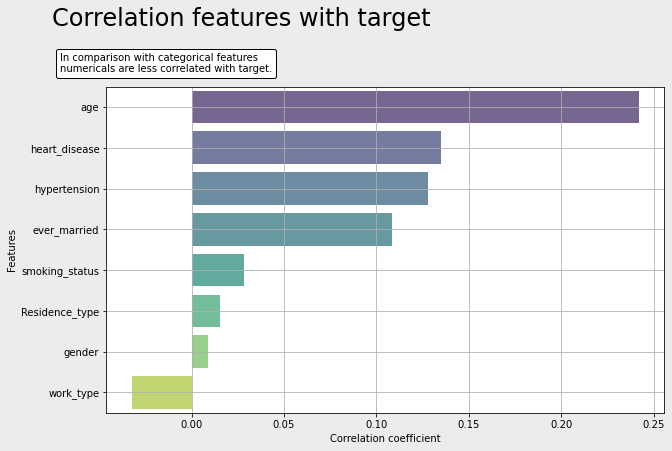

In [27]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

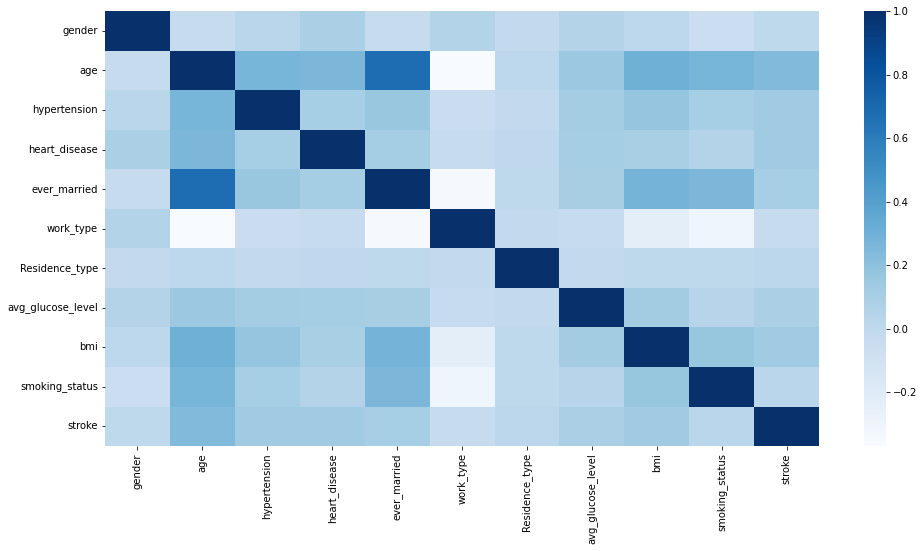

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

Feature ranking:
1. feature 1 (0.681038)
2. feature 7 (0.107527)
3. feature 5 (0.068106)
4. feature 3 (0.030871)
5. feature 0 (0.030857)
6. feature 2 (0.029756)
7. feature 6 (0.027659)
8. feature 4 (0.024185)


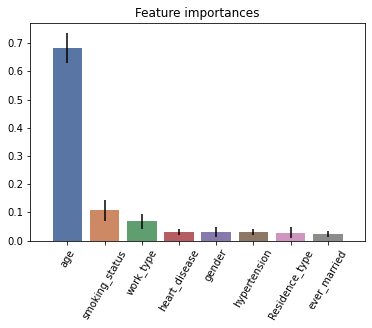

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

## Fixing Dataset (Missing Value and Unbalanced Target Class)

In [30]:
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)

array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 475.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [31]:
en_df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
X , y = en_df_imputed[features],en_df_imputed["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7788, 8)
After OverSampling, the shape of train_y: (7788,) 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894


## Modeling

In [33]:
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Ada Boost',
    'SVM',
    'XG Boost',
    'Cat Boost']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [34]:
def run_exp_on_feature(x_train,y_train,x_test,y_test):
    #x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2, random_state=23)
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['Ada Boost ',AdaBoostClassifier()],
            ['SVM ',SVC()],
            ['XG Boost',XGBClassifier()],
            ['Cat Boost',CatBoostClassifier(logging_level='Silent')]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('############################################')
        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    
        
    return models_score

In [36]:
models_score = run_exp_on_feature(x_train,y_train,x_test,y_test)

[[967   0]
 [ 55   0]]
Logistic Regression 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[[960   7]
 [ 52   3]]
KNearest Neighbor 
Validation Acuuracy:  0.9422700587084148
Training Accuracy:  0.9549902152641878
############################################


[[936  31]
 [ 52   3]]
Decision Tree Classifier 
Validation Acuuracy:  0.9187866927592955
Training Accuracy:  0.9809197651663405
############################################


[[941  26]
 [ 54   1]]
Random Forest Classifier 
Validation Acuuracy:  0.9217221135029354
Training Accuracy:  0.9809197651663405
############################################


[[967   0]
 [ 55   0]]
Ada Boost 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[[967   0]
 [ 55   0]]
SVM 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[22:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[960   7]
 [ 53   2]]
XG Boost
Validation Acuuracy:  0.9412915851272016
Training Accuracy:  0.9620841487279843
############################################


[[959   8]
 [ 54   1]]
Cat Boost
Validation Acuuracy:  0.9393346379647749
Training Accuracy:  0.9647749510763209
############################################


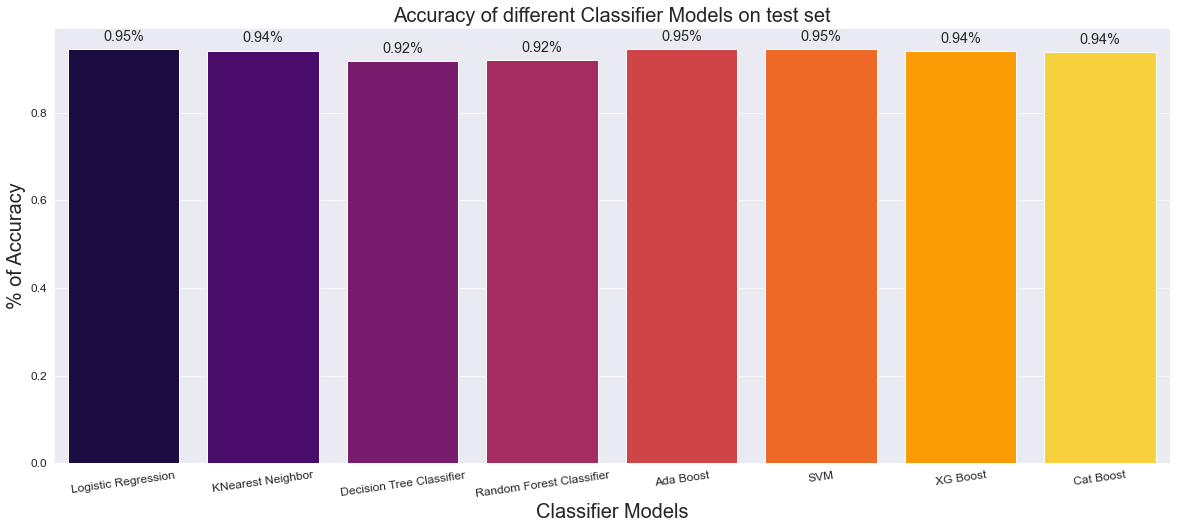

In [37]:
hist_score(models_score)

In [38]:
SEED=21
def xgb_tuning(new_features,labels):
    list_scores=[]    
    parameters = {
        
        'max_depth': [3, 5, 7, 9], 
        'n_estimators': [5, 10, 15, 20, 25, 50, 100],
        'learning_rate': [0.01, 0.05, 0.1]
    }

    model_xgb = XGBClassifier(objective = "binary:logistic",
               eval_metric = "logloss",
               learning_rate = 0.1,
        random_state=SEED,
    )

    scores = ['f1','precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            model_xgb, parameters,cv=5, scoring='%s_macro' % score
        )
        clf.fit(new_features, labels)

        print(clf.cv_results_['mean_test_score']) 
        print(clf.cv_results_['std_test_score'])

        list_scores.append([clf.cv_results_['mean_test_score'][clf.best_index_],clf.cv_results_['std_test_score'][clf.best_index_]])
    return clf,list_scores

In [39]:
clf,list_scores = xgb_tuning(x_train,y_train)

# Tuning hyper-parameters for f1

[0.50234409 0.50234409 0.50234409 0.50234409 0.50234409 0.50234409
 0.49246566 0.50214413 0.50214413 0.50189364 0.49708293 0.49708293
 0.49721187 0.49214392 0.50634216 0.50640691 0.50658733 0.50176422
 0.50176422 0.5063474  0.50146742 0.50546229 0.50603804 0.50639355
 0.50157044 0.50157044 0.51065464 0.50133896 0.50234409 0.50234409
 0.50234409 0.49752678 0.49246566 0.49271623 0.49271623 0.49708293
 0.49721187 0.49721187 0.49214392 0.48733369 0.48739795 0.48752649
 0.50169947 0.50140822 0.5017639  0.49652825 0.49665767 0.50074821
 0.50558505 0.50150569 0.50138962 0.50163528 0.50120954 0.49169267
 0.49624273 0.49910541 0.50234409 0.49752678 0.49265188 0.49271623
 0.49271623 0.49271623 0.49265188 0.49714744 0.49227286 0.48733369
 0.48733369 0.48746222 0.48746222 0.49196342 0.49682505 0.49646341
 0.49195039 0.49183449 0.49631219 0.50098343 0.50403535 0.50621837
 0.51084648 0.50130316 0.49642858 0.50057369 0.50407564 0.50666199]
[0.01987329 0.01987329 0.01

In [40]:
list_scores

[[0.5108464756299612, 0.02623789781313887],
 [0.6765641670069591, 0.2453230048102843],
 [0.5110230069547763, 0.01500398523289007]]